<H3>Data Cleaning</H3>

In [22]:
#importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load data
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

In [4]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
#finding out columns with missing values
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
#removing unnessesary columns
df1 = data.drop(columns=['society','availability','area_type'])
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df2 = df1.copy()

In [8]:
#Now we fill in the missing cells of balcony and bath with mean values
df2.balcony = df2.balcony.fillna(int(df2.balcony.mean()))
df2.bath = df2.bath.fillna(int(df2.bath.mean()))

In [9]:
#Since rest of NaN values are insignificant we will remove the rows with NaN values
df3 = df2.dropna()

In [10]:
df3.shape

(13303, 6)

In [11]:
df3.isna().any()

location      False
size          False
total_sqft    False
bath          False
balcony       False
price         False
dtype: bool

_From the above code we have now removed our empty cells from data_

_Now we will look into other anomilities in the data contained_

In [12]:
df3['size'].head(10).value_counts()

size
2 BHK        3
3 BHK        3
4 BHK        2
4 Bedroom    1
6 Bedroom    1
Name: count, dtype: int64

_We can see that the size column contain data which should be modifies_

In [13]:
#Create a new column to store only the integer values from size column
df3['BHK'] = df3['size'].apply(lambda x:int(x.split()[0]))
df3.BHK.head().value_counts()

C:\Users\Rohith\AppData\Local\Temp\ipykernel_15620\3858588710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x:int(x.split()[0]))


BHK
2    2
3    2
4    1
Name: count, dtype: int64

_The total_sqft data should be modified for that we will pass it to a function __"to_float()"___

In [14]:
'''
The to_float() function converts the object to floating values and if the object is in range
it will take the mean of values and drop rest of the cells
'''
def to_float(x):
    try:
        if x.isdigit():
            z = float(x)
        else:
            a = x.split()
            z = (float(a[0]) + float(a[2])) / 2
        return z
    except (IndexError, ValueError):
        return None


In [15]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(lambda x:to_float(x))

In [16]:
df5 = df4.dropna()

In [17]:
df5.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [18]:
df6 = df5[~(df5.total_sqft/df5.BHK<300)]
df6.shape

(12426, 7)

_Add a column for Price_Per_Sqft_

In [19]:
df6['price_per_sqft'] = (df6.price*100000)/df6.total_sqft
df6.head()

C:\Users\Rohith\AppData\Local\Temp\ipykernel_15620\273592204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['price_per_sqft'] = (df6.price*100000)/df6.total_sqft


,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [20]:
df6['price_per_sqft'].describe()

count     12426.000000
mean       6296.222105
std        4160.725251
min         267.829813
25%        4207.320004
50%        5286.466186
75%        6899.980754
max      176470.588235
Name: price_per_sqft, dtype: float64

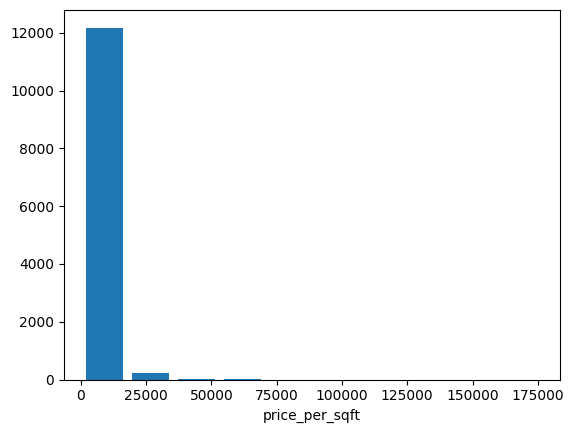

In [23]:
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.show()

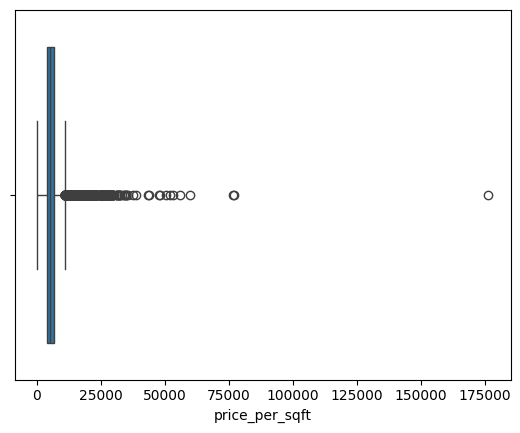

In [47]:
import seaborn as sns
sns.boxplot(x=df6.price_per_sqft)
plt.xlabel('price_per_sqft')
plt.show()

from the graph we can see that there are ome outliers in the price_per_sqft. We wil be removing this outliers

In [24]:
df6.price_per_sqft.count()

12426

To eliminate the outliers We define the upper contraol limit and lower control limit and exclude all other data that are beyound this limit. For that we will use the __within_range()__ function

In [26]:
uct = np.mean(df6.price_per_sqft) + np.std(df6.price_per_sqft)
lct = np.mean(df6.price_per_sqft) - np.std(df6.price_per_sqft)   
def within_range(x):
    if x>lct and x<uct:
        return x
    else:
        return None

In [27]:
df7 = df6.copy()
df7.price_per_sqft = df7.price_per_sqft.apply(lambda x : within_range(x))

In [49]:
df6.price_per_sqft.describe()

count     12426.000000
mean       6296.222105
std        4160.725251
min         267.829813
25%        4207.320004
50%        5286.466186
75%        6899.980754
max      176470.588235
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft'>

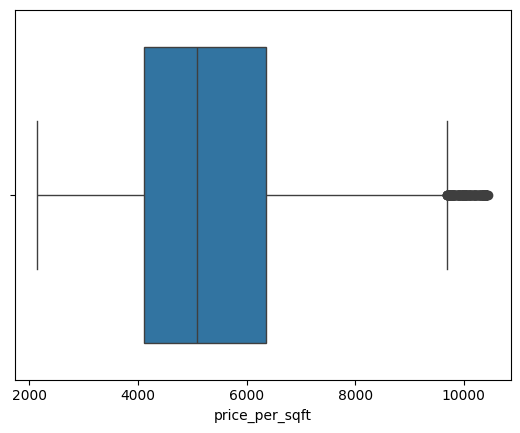

In [67]:
sns.boxplot(x=df8.price_per_sqft)

In [28]:
df8 =df7.dropna()
df8.isna().any()

location          False
size              False
total_sqft        False
bath              False
balcony           False
price             False
BHK               False
price_per_sqft    False
dtype: bool

In [29]:
df8.price_per_sqft.count()

11268

In [30]:
df8.price_per_sqft.describe()

count    11268.000000
mean      5362.607931
std       1660.288623
min       2149.277061
25%       4118.050789
50%       5084.745763
75%       6349.206349
max      10451.661068
Name: price_per_sqft, dtype: float64

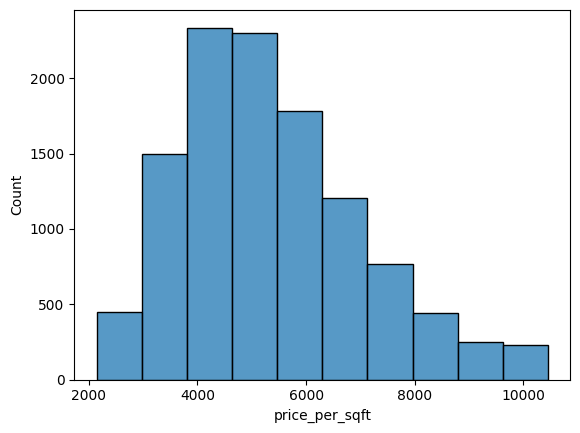

In [81]:
sns.histplot(data = df8,x='price_per_sqft',bins=10)
plt.xlabel('price_per_sqft')
plt.show()

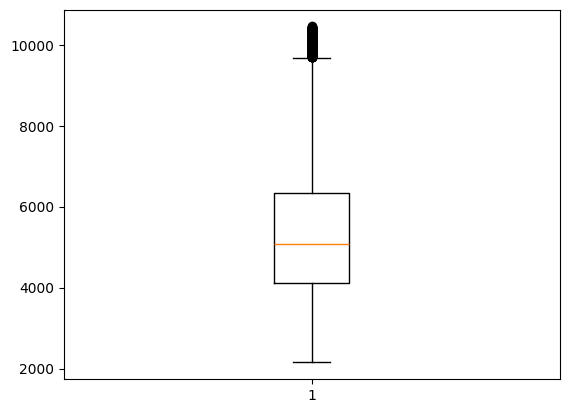

In [44]:
plt.boxplot(df8.price_per_sqft)
plt.show()

From above we can conclude our outliers have reduced considerabily

In [32]:
df8.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [33]:
df8.isna().any()

location          False
size              False
total_sqft        False
bath              False
balcony           False
price             False
BHK               False
price_per_sqft    False
dtype: bool

for next we will group together location data with _value_counts() less than 10_ to a common group termed __"others"__

In [34]:
def change_loc(x,df):
    if df.location.value_counts()[x]<10:
        return "others"
    else:
        return x

In [35]:
df9 = df8.copy()
df9.location = df9.location.apply(lambda x:change_loc(x,df8))

In [36]:
df8.location.value_counts()

location
Whitefield             496
Sarjapur  Road         374
Electronic City        287
Kanakpura Road         264
Thanisandra            230
                      ... 
2nd Block Jayanagar      1
Ganesha Block            1
Seshadripuram            1
Hennur Busstop           1
Sarvobhogam Nagar        1
Name: count, Length: 1092, dtype: int64

In [37]:
df9.location.value_counts()

location
others                   2235
Whitefield                496
Sarjapur  Road            374
Electronic City           287
Kanakpura Road            264
                         ... 
Banashankari Stage VI      10
Doddaballapur              10
Chikkabanavar              10
Gunjur Palya               10
Dodsworth Layout           10
Name: count, Length: 216, dtype: int64

In [38]:
df9.shape

(11268, 8)

In [39]:
df9.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [40]:
#drop rows with contain number of bathrooms more than nummber of bedrooms
df10 = df9[~(df9.BHK<df9.bath)]
df10.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248


In [41]:
df11 = df10.drop(columns = ['size','price_per_sqft'])
df11.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2


In [42]:
df11.shape

(10698, 6)

In [93]:
df11.to_csv('data.csv', index=False)